In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
Ventas = pd.read_excel("Reporte_ventas.xlsx",skiprows=2,parse_dates =['FECHA VENTA'])
Pagos = pd.read_excel("Pagos_Detallados.xlsx")

In [67]:
crm = pd.read_excel("crm.xlsx")

In [70]:
Ventas

,FECHA VENTA,HORA VENTA,DNI,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA
0,2022-09-28,17:53:01,70574793,Teodoro Andree Yangali Hayen,CINDY MARIELA PEÑA GODOS,VN0001262,DD04,57639.51,156,SEPARACION
1,2022-09-28,16:23:12,43873792,LUIS CARLOS BARBIERI ARBULU,LUIS FERNANDO DELGADO WONG,VN0001261,DB18,42140.00,156,PAGANDO CUOTAS
2,2022-09-28,16:22:54,43873792,LUIS CARLOS BARBIERI ARBULU,LUIS FERNANDO DELGADO WONG,VN0001260,DB19,42140.00,156,PAGANDO CUOTAS
3,2022-09-27,12:03:09,40413308,JOSE JAVIER ARMAS VENTURA,RAMIRO CIRO ERNESTO AVILES RUIZ,VN0001259,DG09,48461.00,156,SEPARACION
4,2022-09-26,17:15:58,46542123,ERICK GIAMPIERE VARGAS RUIZ,RUBEN MADRID SIANCAS,VN0001258,DA13,40000.00,162,PAGANDO CUOTAS
...,...,...,...,...,...,...,...,...,...,...
1248,2021-02-18,18:19:28,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000005,EI26,34135.50,120,ANULADA
1249,2021-02-18,16:40:09,9920379,CIELO JANE HUAMAN ASTUDILLO,KENNY SMITH SANCARRANCO BAZAN,VN0000004,EE25,27394.50,120,PAGANDO CUOTAS
1250,2021-02-18,16:10:14,2709470,MARIO MARTIN VASQUEZ SARANGO,OSCAR ANDRES MIRANDA VEGA,VN0000003,EE26,27394.50,120,ANULADA
1251,2021-02-18,11:40:23,42386242,RODOLFO ALFREDO TAVARA RODRICH,OSCAR ANDRES MIRANDA VEGA,VN0000002,EE27,27394.50,120,ANULADA


In [71]:
Ventas_Sep = Ventas[(Ventas["FECHA VENTA"] > "2022-08-31") &(Ventas["ESTADO VENTA"] == "PAGANDO CUOTAS")]

In [72]:
Ventas_AGO = Ventas[(Ventas["FECHA VENTA"] > "2022-07-31") & \
                    (Ventas["FECHA VENTA"] < "2022-09-01") & \
                    (Ventas["ESTADO VENTA"] == "PAGANDO CUOTAS")]

In [73]:
crm2 = crm[crm["NIVEL DE INTERES"] == "Compro"]

In [16]:
Ventas_Sep["VENDEDOR"].value_counts()

LUIS FERNANDO DELGADO WONG         9
RAMIRO CIRO ERNESTO AVILES RUIZ    8
CINDY MARIELA PEÑA GODOS           5
RUBEN MADRID SIANCAS               3
KEMBER YASOLI HERRERA PERALTA      3
KENNY SMITH SANCARRANCO BAZAN      1
Name: VENDEDOR, dtype: int64

In [76]:
Ventas["ESTADO VENTA"].value_counts()

PAGANDO CUOTAS    664
ANULADA           353
VENCIDA            96
RESOLUCIÓN         38
DESISTIMIENTO      30
PRE-RESUELTO       30
DEVOLUCION C.I     28
SEPARACION          9
DEVUELTO            5
Name: ESTADO VENTA, dtype: int64

In [17]:
Ventas_AGO["VENDEDOR"].value_counts()

RAMIRO CIRO ERNESTO AVILES RUIZ    16
CINDY MARIELA PEÑA GODOS           11
LUIS FERNANDO DELGADO WONG         10
RUBEN MADRID SIANCAS                6
KEMBER YASOLI HERRERA PERALTA       6
MAYRA YESENIA LLERENA MUÑOZ         5
FRANCISCO JAVIER ZAPATA LEON        4
MILAGROS DEL PILAR TRELLES DEZA     4
KENNY SMITH SANCARRANCO BAZAN       3
LUIS MANUEL LANDEO OBANDO           2
Name: VENDEDOR, dtype: int64

In [22]:
crm2.columns

Index(['FECHA DE REGISTRO', 'HORA DE REGISTRO', 'VENDEDORES', 'ORIGEN',
       'DIRECCION', 'QUE BUSCA', 'TIPO LOTES', 'PRECIOS', 'OBSERVACION',
       'HORARIO DISPONIBLE', 'CLIENTE', 'DNI', 'TELEFONO', 'NIVEL DE INTERES',
       'NOMBRE PROXIMO EVENTO', 'FECHA PROXIMO EVENTO',
       'FECHA DE ULTIMA INTERACION'],
      dtype='object')

In [28]:
a = set(crm2.CLIENTE)
b= set(Ventas["NOMBRE COMPLETO"])
len(a.intersection(b))

602

In [29]:
a.difference(b)

{'CRISTHIAN JUNIOR NUNURA CARHUACHINCHAY',
 'CYNTHIA NABILA SANZ ACOSTA',
 'EMMA ROSA DE LOS MILAGROS PIEDRA MAZA'}

In [77]:
Mezcla = pd.merge(Ventas,crm2, how = "left",left_on = ["NOMBRE COMPLETO"],
                                    right_on = ["CLIENTE"])

In [49]:
Mezcla_2 = pd.merge(Ventas,crm, how = "left",left_on = ["NOMBRE COMPLETO"],
                    right_on = ["CLIENTE"])


In [78]:
Mezcla_2

,FECHA VENTA,HORA VENTA,DNI_x,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA,FECHA DE REGISTRO,HORA DE REGISTRO,VENDEDORES,ORIGEN,DIRECCION,QUE BUSCA,TIPO LOTES,PRECIOS,OBSERVACION,HORARIO DISPONIBLE,CLIENTE,DNI_y,TELEFONO,NIVEL DE INTERES,NOMBRE PROXIMO EVENTO,FECHA PROXIMO EVENTO,FECHA DE ULTIMA INTERACION
0,2022-09-28,17:53:01,70574793,Teodoro Andree Yangali Hayen,CINDY MARIELA PEÑA GODOS,VN0001262,DD04,57639.51,156,SEPARACION,2022-09-28,12:42:03,CINDY MARIELA,Facebook_Leads,NaN,NaN,NaN,NaN,por la mañana,NaN,Teodoro Andree Yangali Hayen,70574793,993026588,Interesado Alto,Cita Virtual,2022-09-28 16:00:00,2022-09-28
1,2022-09-28,16:23:12,43873792,LUIS CARLOS BARBIERI ARBULU,LUIS FERNANDO DELGADO WONG,VN0001261,DB18,42140.00,156,PAGANDO CUOTAS,2022-09-28,16:11:12,LUIS FERNANDO,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,LUIS CARLOS BARBIERI ARBULU,43873792,017866086776,Compro,NaN,NaN,2022-09-28
2,2022-09-28,16:22:54,43873792,LUIS CARLOS BARBIERI ARBULU,LUIS FERNANDO DELGADO WONG,VN0001260,DB19,42140.00,156,PAGANDO CUOTAS,2022-09-28,16:11:12,LUIS FERNANDO,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,LUIS CARLOS BARBIERI ARBULU,43873792,017866086776,Compro,NaN,NaN,2022-09-28
3,2022-09-27,12:03:09,40413308,JOSE JAVIER ARMAS VENTURA,RAMIRO CIRO ERNESTO AVILES RUIZ,VN0001259,DG09,48461.00,156,SEPARACION,2022-09-26,11:17:03,RAMIRO CIRO ERNESTO,Call Center,NaN,NaN,NaN,NaN,A partir de las 6y30pm,NaN,JOSE JAVIER ARMAS VENTURA,40413308,992544056,Interesado Alto,Cita Virtual,2022-09-26 19:01:00,2022-09-27
4,2022-09-26,17:15:58,46542123,ERICK GIAMPIERE VARGAS RUIZ,RUBEN MADRID SIANCAS,VN0001258,DA13,40000.00,162,PAGANDO CUOTAS,2022-09-26,09:33:26,RUBEN,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,ERICK GIAMPIERE VARGAS RUIZ,46542123,993794005,Compro,Llamada,2022-09-28 10:00:00,2022-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2021-02-18,18:19:28,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000005,EI26,34135.50,120,ANULADA,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1255,2021-02-18,16:40:09,9920379,CIELO JANE HUAMAN ASTUDILLO,KENNY SMITH SANCARRANCO BAZAN,VN0000004,EE25,27394.50,120,PAGANDO CUOTAS,2021-02-18,NaN,LUIS FERNANDO,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,CIELO JANE HUAMAN ASTUDILLO,09920379,970280027,Compro,NaN,NaN,2021-02-18
1256,2021-02-18,16:10:14,2709470,MARIO MARTIN VASQUEZ SARANGO,OSCAR ANDRES MIRANDA VEGA,VN0000003,EE26,27394.50,120,ANULADA,2021-02-18,NaN,Oficina,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,MARIO MARTIN VASQUEZ SARANGO,02709470,953621786,Compro,NaN,NaN,2021-02-18
1257,2021-02-18,11:40:23,42386242,RODOLFO ALFREDO TAVARA RODRICH,OSCAR ANDRES MIRANDA VEGA,VN0000002,EE27,27394.50,120,ANULADA,2021-02-18,NaN,OSCAR ANDRES,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,RODOLFO ALFREDO TAVARA RODRICH,42386242,987490141,NaN,NaN,NaN,2021-02-18


/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/4200689309.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


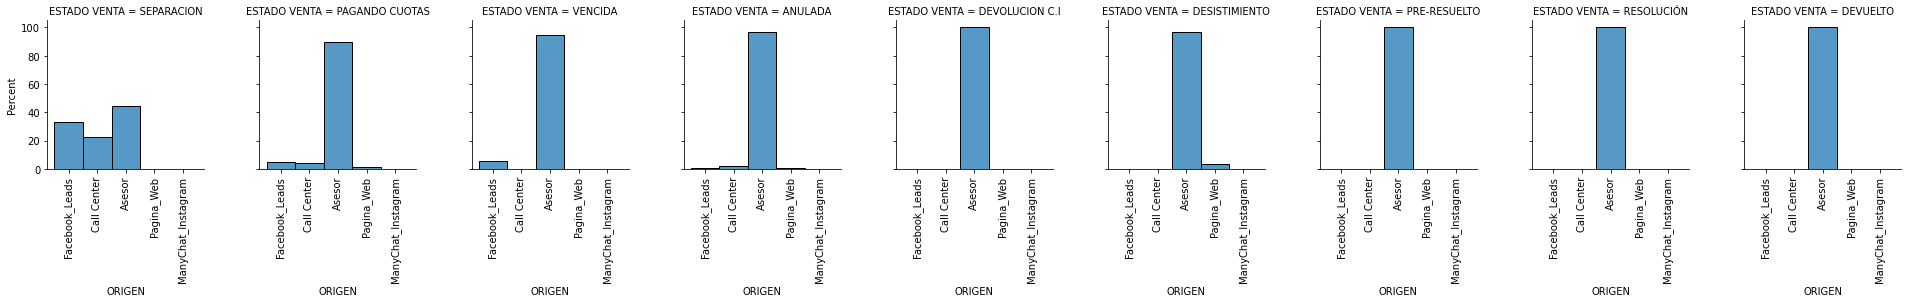

In [54]:
g2 = sns.FacetGrid(Mezcla_2, col="ESTADO VENTA")
g2.map_dataframe(sns.histplot, x= "ORIGEN",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [55]:
Comparativo = ["PAGANDO CUOTAS","VENCIDA","ANULADA","SEPARACION"]
sub_base = Mezcla_2[Mezcla_2["ESTADO VENTA"].isin(Comparativo)]

In [91]:
Mezcla_2.tail(10)

,FECHA VENTA,HORA VENTA,DNI_x,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA,FECHA DE REGISTRO,HORA DE REGISTRO,VENDEDORES,ORIGEN,DIRECCION,QUE BUSCA,TIPO LOTES,PRECIOS,OBSERVACION,HORARIO DISPONIBLE,CLIENTE,DNI_y,TELEFONO,NIVEL DE INTERES,NOMBRE PROXIMO EVENTO,FECHA PROXIMO EVENTO,FECHA DE ULTIMA INTERACION
1249,2021-02-19,09:33:50,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000010,EI28,34387.5,120,PAGANDO CUOTAS,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1250,2021-02-19,09:33:32,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000009,EI27,34135.5,120,PAGANDO CUOTAS,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1251,2021-02-19,09:32:08,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000008,EI24,34135.5,120,PAGANDO CUOTAS,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1252,2021-02-19,09:31:58,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000007,EI23,30471.0,120,PAGANDO CUOTAS,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1253,2021-02-18,18:38:32,43953978,HAROLD ANDRES CAVERO PAREDES,MILAGROS DEL PILAR TRELLES DEZA,VN0000006,EI28,34387.5,120,ANULADA,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD ANDRES CAVERO PAREDES,43953978,995279881,Compro,NaN,NaN,2021-02-18
1254,2021-02-18,18:19:28,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000005,EI26,34135.5,120,ANULADA,2021-02-18,NaN,MILAGROS DEL PILAR,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,HAROLD OSWALDO CAVERO PORTILLA,02667241,969640952,Compro,NaN,NaN,2021-02-18
1255,2021-02-18,16:40:09,9920379,CIELO JANE HUAMAN ASTUDILLO,KENNY SMITH SANCARRANCO BAZAN,VN0000004,EE25,27394.5,120,PAGANDO CUOTAS,2021-02-18,NaN,LUIS FERNANDO,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,CIELO JANE HUAMAN ASTUDILLO,09920379,970280027,Compro,NaN,NaN,2021-02-18
1256,2021-02-18,16:10:14,2709470,MARIO MARTIN VASQUEZ SARANGO,OSCAR ANDRES MIRANDA VEGA,VN0000003,EE26,27394.5,120,ANULADA,2021-02-18,NaN,Oficina,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,MARIO MARTIN VASQUEZ SARANGO,02709470,953621786,Compro,NaN,NaN,2021-02-18
1257,2021-02-18,11:40:23,42386242,RODOLFO ALFREDO TAVARA RODRICH,OSCAR ANDRES MIRANDA VEGA,VN0000002,EE27,27394.5,120,ANULADA,2021-02-18,NaN,OSCAR ANDRES,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,RODOLFO ALFREDO TAVARA RODRICH,42386242,987490141,NaN,NaN,NaN,2021-02-18
1258,2021-02-18,11:36:48,42386242,RODOLFO ALFREDO TAVARA RODRICH,OSCAR ANDRES MIRANDA VEGA,VN0000001,EE28,33750.0,120,ANULADA,2021-02-18,NaN,OSCAR ANDRES,Asesor,NaN,NaN,NaN,NaN,NaN,NaN,RODOLFO ALFREDO TAVARA RODRICH,42386242,987490141,NaN,NaN,NaN,2021-02-18


In [89]:
Mezcla_2["ESTADO VENTA"].value_counts()

PAGANDO CUOTAS    668
ANULADA           354
VENCIDA            96
RESOLUCIÓN         39
DESISTIMIENTO      30
PRE-RESUELTO       30
DEVOLUCION C.I     28
SEPARACION          9
DEVUELTO            5
Name: ESTADO VENTA, dtype: int64

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/2731037184.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


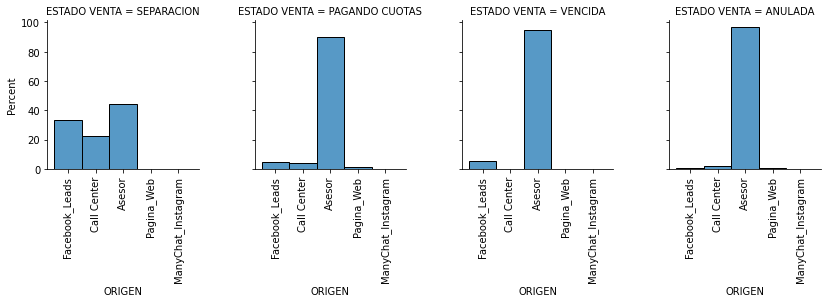

In [56]:
g2 = sns.FacetGrid(sub_base, col="ESTADO VENTA")
g2.map_dataframe(sns.histplot, x= "ORIGEN",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [58]:
U_4_meses = sub_base[sub_base["FECHA VENTA"] >= "2022-05-31"]

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/2196035354.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


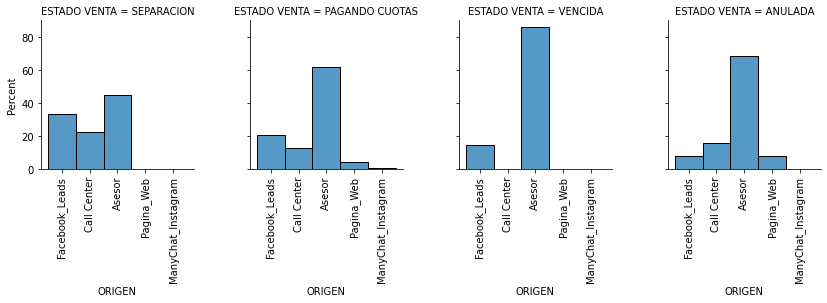

In [59]:
g2 = sns.FacetGrid(U_4_meses, col="ESTADO VENTA")
g2.map_dataframe(sns.histplot, x= "ORIGEN",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [60]:
U_8_meses = sub_base[sub_base["FECHA VENTA"] >= "2022-01-31"]

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/3795043745.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


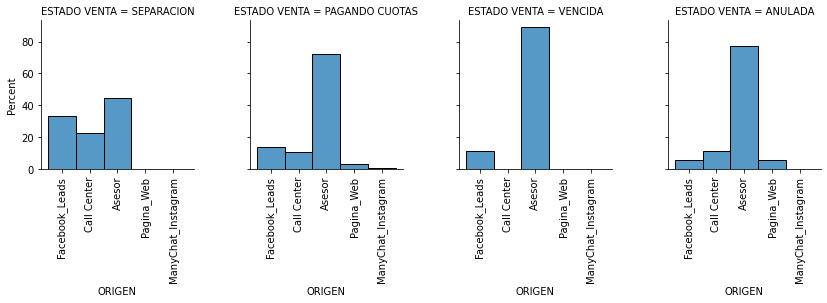

In [61]:
g2 = sns.FacetGrid(U_8_meses, col="ESTADO VENTA")
g2.map_dataframe(sns.histplot, x= "ORIGEN",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [63]:
U_12_meses = sub_base[sub_base["FECHA VENTA"] >= "2021-09-30"]

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/296056118.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


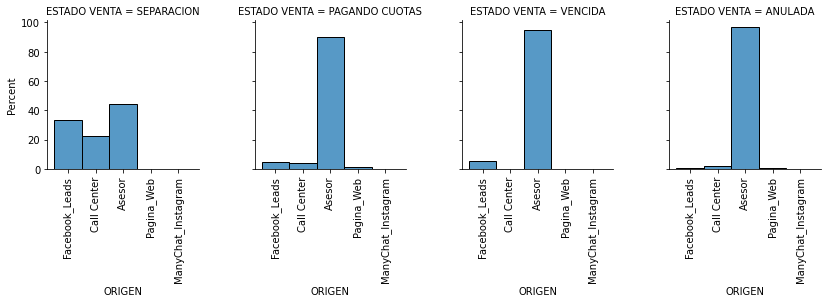

In [64]:
g2 = sns.FacetGrid(U_12_meses, col="ESTADO VENTA")
g2.map_dataframe(sns.histplot, x= "ORIGEN",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/2509477210.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


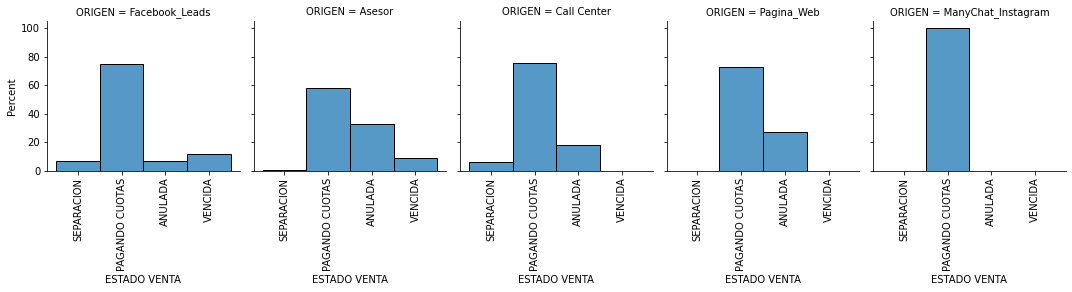

In [90]:
g2 = sns.FacetGrid(U_12_meses, col="ORIGEN")
g2.map_dataframe(sns.histplot, x= "ESTADO VENTA",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [82]:
U_12_meses.columns

Index(['FECHA VENTA', 'HORA VENTA', 'DNI_x', 'NOMBRE COMPLETO', 'VENDEDOR',
       'CODIGO', 'LOTE', 'PRECIO', 'N CUOTAS', 'ESTADO VENTA',
       'FECHA DE REGISTRO', 'HORA DE REGISTRO', 'VENDEDORES', 'ORIGEN',
       'DIRECCION', 'QUE BUSCA', 'TIPO LOTES', 'PRECIOS', 'OBSERVACION',
       'HORARIO DISPONIBLE', 'CLIENTE', 'DNI_y', 'TELEFONO',
       'NIVEL DE INTERES', 'NOMBRE PROXIMO EVENTO', 'FECHA PROXIMO EVENTO',
       'FECHA DE ULTIMA INTERACION'],
      dtype='object')

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/1073188480.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


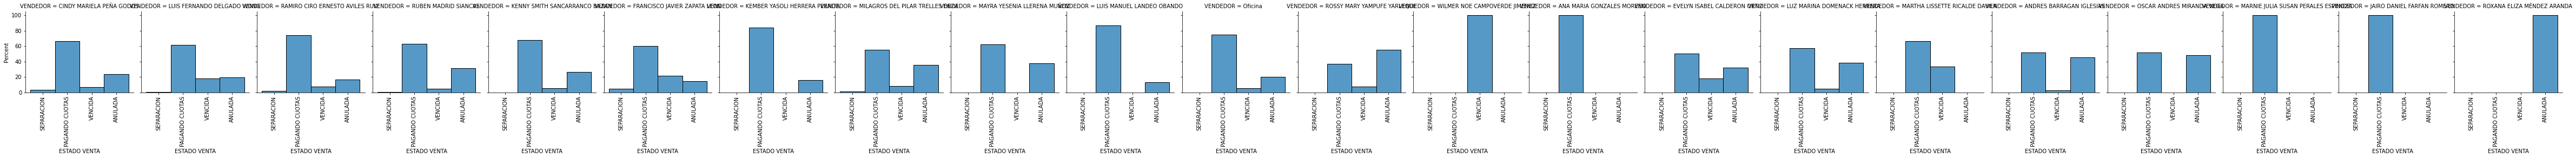

In [83]:
g2 = sns.FacetGrid(U_12_meses, col="VENDEDOR")
g2.map_dataframe(sns.histplot, x= "ESTADO VENTA",stat='percent')

for axes in g2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [85]:
U_12_meses["VENDEDOR"].value_counts()

MILAGROS DEL PILAR TRELLES DEZA        190
RUBEN MADRID SIANCAS                   163
LUIS FERNANDO DELGADO WONG             160
ROSSY MARY YAMPUFE YARLEQUE             92
KENNY SMITH SANCARRANCO BAZAN           90
ANDRES BARRAGAN IGLESIAS                79
FRANCISCO JAVIER ZAPATA LEON            70
OSCAR ANDRES MIRANDA VEGA               64
RAMIRO CIRO ERNESTO AVILES RUIZ         54
LUZ MARINA DOMENACK HERRERA             42
CINDY MARIELA PEÑA GODOS                30
EVELYN ISABEL CALDERON ORTIZ            22
Oficina                                 20
KEMBER YASOLI HERRERA PERALTA           19
LUIS MANUEL LANDEO OBANDO               15
MAYRA YESENIA LLERENA MUÑOZ              8
MARTHA LISSETTE RICALDE DAVILA           3
ANA MARIA GONZALES MORENO                2
WILMER NOE CAMPOVERDE JIMENEZ            1
MARNIE JULIA SUSAN PERALES ESPINOZA      1
JAIRO DANIEL FARFAN ROMERO               1
ROXANA ELIZA MÉNDEZ ARANDA               1
Name: VENDEDOR, dtype: int64

In [86]:
Primer_batch_vendedores = ["MILAGROS DEL PILAR TRELLES DEZA",
"RUBEN MADRID SIANCAS",
"LUIS FERNANDO DELGADO WONG",            
"ROSSY MARY YAMPUFE YARLEQUE",             
"KENNY SMITH SANCARRANCO BAZAN",
"ANDRES BARRAGAN IGLESIAS",
"FRANCISCO JAVIER ZAPATA LEON",            
"OSCAR ANDRES MIRANDA VEGA"   ]

/var/folders/kk/zqwkq7f52ln28426m8r4dkb00000gn/T/ipykernel_71743/3919817247.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


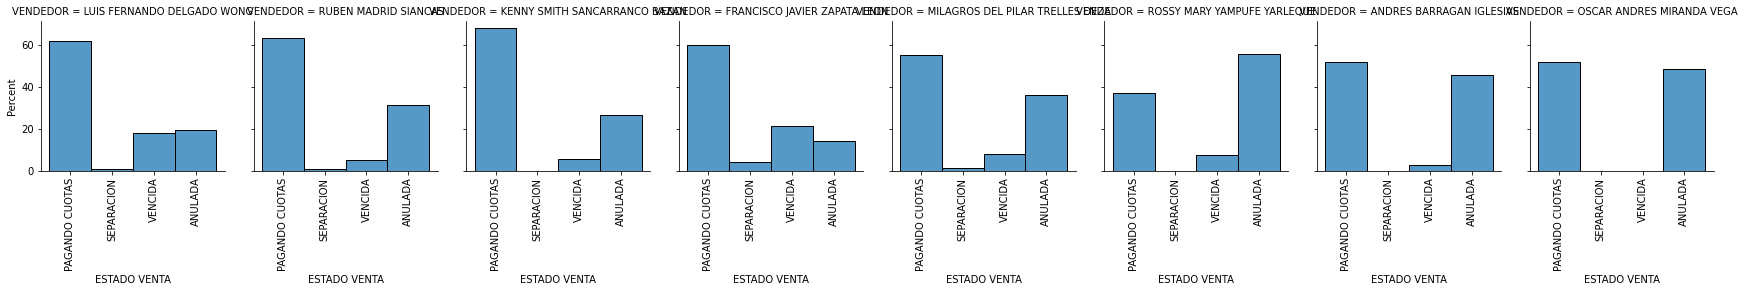

In [88]:
Primeros_vendedores = sns.FacetGrid(U_12_meses[U_12_meses["VENDEDOR"].isin(Primer_batch_vendedores)], col="VENDEDOR")
Primeros_vendedores.map_dataframe(sns.histplot, x= "ESTADO VENTA",stat='percent')

for axes in Primeros_vendedores.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [49]:
Pagos['id_venta'].value_counts()

1030    170
1031    169
1038    169
1048    165
1022    163
       ... 
59        2
60        2
106       2
262       2
165       2
Name: id_venta, Length: 658, dtype: int64

In [56]:
print("La cantidad de ids de ventas en la base es : " + str(len(Pagos["id_venta"].unique())))

La cantidad de ids de ventas en la base es : 658


In [58]:
Ventas["ESTADO VENTA"].value_counts()

PAGANDO CUOTAS    660
ANULADA           353
VENCIDA            96
RESOLUCIÓN         38
DESISTIMIENTO      30
PRE-RESUELTO       30
DEVOLUCION C.I     28
SEPARACION          8
DEVUELTO            5
Name: ESTADO VENTA, dtype: int64

In [68]:
len(Ventas[Ventas["ESTADO VENTA"] == "PAGANDO CUOTAS"]["CODE"].unique())

660

In [60]:
intersection(set(Ventas["CODE"]),set(Pagos["CODE"]))

NameError: name 'intersection' is not defined

In [80]:
a = set(Ventas)
a_2 = set(Ventas[Ventas["ESTADO VENTA"] == "PAGANDO CUOTAS"]["CODE"])
b = set(Pagos["id_venta"])
r = a.intersection(b)
c = a_2.difference(b)

In [78]:
Ventas[Ventas["CODE"] == "PAGANDO CUOTAS"][""]

Series([], Name: CODE, dtype: int64)

In [71]:
Pagos[Pagos["id_venta"].isin(r)].head(2)

,id_venta,id_proy,etapa,lote,dni,cliente,tel1,tel2,FormaPago,Asesor,fecven,Cuota,Saldo Capital,Capital,Interes,Monto Cuota,Importe Pagado,Fecha de Pago,Importe Pago,Tipo de Pago,Banco,Cuenta,numero_operacion,mora,Observacion,Referencia,Detalle,Registro Pago,Hora Pago,Usuario,Venta Fecha Registro,Estado Cuota
0,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44253.625033,Cuota 1,27394.50,105.37,320.92,426.3,426.3,44245.625033,426.3,Transferencia Interbancaria,BBVA,0011-0245-01-00025399,2,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 1,44245.625033,16:50:51,NaN,2021-02-18,Pagada
1,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44281.583367,Cuota 2,27289.13,106.61,319.69,426.3,426.3,44281.583367,426.3,Deposito en Cuenta,BBVA,0011-0245-01-00025380,30,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 2,44296.583367,12:24:56,NaN,2021-02-18,Pagada


In [83]:
Ventas[Ventas["CODE"].isin(c)]

,FECHA VENTA,HORA VENTA,DNI,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA,CODE
0,2022-09-24,12:12:17,42671457,GUILIANA LISSETY TROYA VELASQUEZ,RUBEN MADRID SIANCAS,VN0001257,DA14,40000.0,162,PAGANDO CUOTAS,1257
10,2022-09-17,09:27:46,46151132,MARIA NATIVIDAD RAMIREZ ERAZO,KENNY SMITH SANCARRANCO BAZAN,VN0001247,DQ23,40000.0,162,PAGANDO CUOTAS,1247


In [91]:
Pagos

,id_venta,id_proy,etapa,lote,dni,cliente,tel1,tel2,FormaPago,Asesor,fecven,Cuota,Saldo Capital,Capital,Interes,Monto Cuota,Importe Pagado,Fecha de Pago,Importe Pago,Tipo de Pago,Banco,Cuenta,numero_operacion,mora,Observacion,Referencia,Detalle,Registro Pago,Hora Pago,Usuario,Venta Fecha Registro,Estado Cuota
0,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44253.625033,Cuota 1,27394.50,105.37,320.92,426.30,426.3,44245.625033,426.3,Transferencia Interbancaria,BBVA,0011-0245-01-00025399,2,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 1,44245.625033,16:50:51,NaN,2021-02-18,Pagada
1,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44281.583367,Cuota 2,27289.13,106.61,319.69,426.30,426.3,44281.583367,426.3,Deposito en Cuenta,BBVA,0011-0245-01-00025380,30,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 2,44296.583367,12:24:56,NaN,2021-02-18,Pagada
2,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44312.583367,Cuota 3,27182.52,107.86,318.44,426.30,426.3,44309.583367,426.3,Deposito en Cuenta,BBVA,0011-0245-01-00025380,146,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 3,44311.583367,16:14:08,NaN,2021-02-18,Pagada
3,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44342.583367,Cuota 4,27074.66,109.12,317.18,426.30,426.3,44342.583367,426.3,Deposito en Cuenta,BBVA,0011-0245-01-00025380,340,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 4,44342.583367,17:03:11,NaN,2021-02-18,Pagada
4,4,1,TAHITI BLUE - ETAPA 1,EE25,9920379,"HUAMAN ASTUDILLO, CIELO JANE",123456789.0,970280027,FINANCIADO,KENNY SMITH,44373.583367,Cuota 5,26965.54,110.40,315.90,426.30,426.3,44373.583367,426.3,Deposito en Cuenta,BBVA,0011-0245-01-00025380,538,NaN,NaN,NaN,Pago de $ 426.30 del Pago Cuota 5,44375.583367,11:47:30,NaN,2021-02-18,Pagada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65771,1256,2,TAHITI BLUE - ETAPA 2,DP05,73078392,"MUNIVE BEJAR, GRECIA KAMILA",NaN,991293802,FINANCIADO,CINDY MARIELA,49485.583367,Cuota 153,2282.42,560.68,26.74,587.41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-23,Por Pagar
65772,1256,2,TAHITI BLUE - ETAPA 2,DP05,73078392,"MUNIVE BEJAR, GRECIA KAMILA",NaN,991293802,FINANCIADO,CINDY MARIELA,49515.583367,Cuota 154,1721.75,567.24,20.17,587.41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-23,Por Pagar
65773,1256,2,TAHITI BLUE - ETAPA 2,DP05,73078392,"MUNIVE BEJAR, GRECIA KAMILA",NaN,991293802,FINANCIADO,CINDY MARIELA,49546.583367,Cuota 155,1154.50,573.89,13.52,587.41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-23,Por Pagar
65774,1256,2,TAHITI BLUE - ETAPA 2,DP05,73078392,"MUNIVE BEJAR, GRECIA KAMILA",NaN,991293802,FINANCIADO,CINDY MARIELA,49577.583367,Cuota 156,580.61,580.61,6.80,587.41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-23,Por Pagar


In [90]:
Pagos["Importe de Pago"]


KeyError: 'Importe de Pago'

In [21]:
Ventas["NOMBRE COMPLETO"].isna().sum()

0

In [23]:
Ventas["CODIGO"].sample(5) [9:5:-1] VN0001018

239    VN0001018
915    VN0000338
259    VN0000998
712    VN0000541
841    VN0000411
Name: CODIGO, dtype: object

In [35]:
Ventas["CODE"] = Ventas["CODIGO"].str[5:9:1].astype('int')

In [33]:
type(Pagos["id_venta"][1])

numpy.int64

In [36]:
Resultado_parcial_pagos = pd.merge(
    Ventas,
    Pagos,
    how="right",
    left_on=["DNI","LOTE","CODE"],
    right_on=["dni","lote","id_venta"],
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [44]:
Resultado_parcial_pagos.columns

Index(['FECHA VENTA', 'HORA VENTA', 'DNI', 'NOMBRE COMPLETO', 'VENDEDOR',
       'CODIGO', 'LOTE', 'PRECIO', 'N CUOTAS', 'ESTADO VENTA', 'CODE',
       'id_venta', 'id_proy', 'etapa', 'lote', 'dni', 'cliente', 'tel1',
       'tel2', 'FormaPago', 'Asesor', 'fecven', 'Cuota', 'Saldo Capital',
       'Capital', 'Interes', 'Monto Cuota', 'Importe Pagado', 'Fecha de Pago',
       'Importe Pago', 'Tipo de Pago', 'Banco', 'Cuenta', 'numero_operacion',
       'mora', 'Observacion', 'Referencia', 'Detalle', 'Registro Pago',
       'Hora Pago', 'Usuario', 'Venta Fecha Registro', 'Estado Cuota'],
      dtype='object')

In [46]:
Resultado_parcial_pagos["ESTADO VENTA"].value_counts()

PAGANDO CUOTAS    65776
Name: ESTADO VENTA, dtype: int64

In [41]:
Resultado_parcial_pagos.to_excel("Resultado_parcial_pagos.xlsx")

In [35]:
Resultado_parcial_pagos[""]

43209    JAICO GUERRA DE THOMAS, CHRISTINE FIORELLA
559                 CAVERO PORTILLA, HAROLD OSWALDO
15105              SALAZAR LA TORRE, DANTE  GABRIEL
61379                   GONZALES QUEVEDO, JOSE LUIS
30927                      SALOME LUNA, JORGE DAVID
Name: cliente, dtype: object

In [7]:
Pagos.FormaPago.value_counts()

FINANCIADO    65606
CONTADO         170
Name: FormaPago, dtype: int64

In [8]:
Pagos.Asesor.value_counts()

LUIS FERNANDO          11178
MILAGROS DEL PILAR      9459
RUBEN                   8945
KENNY SMITH             5849
RAMIRO CIRO ERNESTO     5605
FRANCISCO JAVIER        4439
ANDRES                  3804
CINDY MARIELA           2552
OSCAR ANDRES            2385
ROSSY MARY              2254
KEMBER YASOLI           2252
LUZ MARINA              1967
LUIS MANUEL             1640
Oficina                 1332
EVELYN ISABEL            990
MAYRA YESENIA            711
ANA MARIA                158
MARTHA LISSETTE          128
JAIRO DANIEL             121
MARNIE JULIA SUSAN         7
Name: Asesor, dtype: int64

In [13]:
Pagos.Banco.value_counts()

BBVA         5975
BCP           443
PROMOCION      70
Name: Banco, dtype: int64

In [14]:
Pagos.mora.value_counts()

0.00     259
2.00     247
4.00     145
6.00      91
8.00      77
        ... 
99.99      1
0.01       1
0.26       1
7.99       1
0.21       1
Name: mora, Length: 77, dtype: int64

In [16]:
Pagos.groupby("Banco")["Tipo de Pago"].value_counts()

Banco      Tipo de Pago               
BBVA       Deposito en Cuenta             5213
           Transferencia Directa           238
           Visanet                         236
           Transferencia Interbancaria     185
           Pago Link                        73
           Izipay                           29
           Cheque de Gerencia                1
BCP        Deposito en Cuenta              339
           Transferencia Directa            91
           Transferencia Interbancaria      13
PROMOCION  Nota de Credito                  70
Name: Tipo de Pago, dtype: int64

In [23]:
np.mean(Pagos["Importe Pagado"]/Pagos["Monto Cuota"])

0.09846350927123267

(array([5.9296e+04, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.4750e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

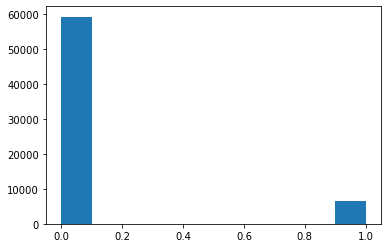

In [21]:
x = Pagos["Importe Pagado"]/Pagos["Monto Cuota"]
plt.hist(x)

In [25]:
Pagos["Estado Cuota"].value_counts()

Por Pagar                59298
Pagada                    6473
Descuento Promocional        5
Name: Estado Cuota, dtype: int64

In [26]:
Pagos[Pagos["Estado Cuota"]=="Pagada"]["Importe Pago"]

0        426.30
1        426.30
2        426.30
3        426.30
4        426.30
          ...  
65151    301.00
65226    328.89
65301    346.15
65460    301.00
65619    377.50
Name: Importe Pago, Length: 6473, dtype: float64

(array([6.253e+03, 9.700e+01, 3.400e+01, 4.000e+01, 2.200e+01, 1.500e+01,
        4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000000e-02, 6.1625090e+03, 1.2325008e+04, 1.8487507e+04,
        2.4650006e+04, 3.0812505e+04, 3.6975004e+04, 4.3137503e+04,
        4.9300002e+04, 5.5462501e+04, 6.1625000e+04]),
 <BarContainer object of 10 artists>)

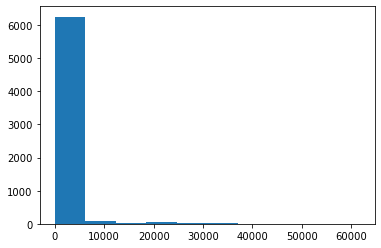

In [27]:
x = Pagos[Pagos["Estado Cuota"]=="Pagada"]["Importe Pago"]
plt.hist(x)

In [92]:
Ventas

,FECHA VENTA,HORA VENTA,DNI,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA,CODE
0,2022-09-24,12:12:17,42671457,GUILIANA LISSETY TROYA VELASQUEZ,RUBEN MADRID SIANCAS,VN0001257,DA14,40000.00,162,PAGANDO CUOTAS,1257
1,2022-09-23,12:16:57,73078392,GRECIA KAMILA MUNIVE BEJAR,CINDY MARIELA PEÑA GODOS,VN0001256,DP05,45300.50,156,PAGANDO CUOTAS,1256
2,2022-09-22,16:30:40,40524061,YENNY LISETTE SAMANIEGO ORTIZ,LUIS FERNANDO DELGADO WONG,VN0001255,DB06,42140.00,158,PAGANDO CUOTAS,1255
3,2022-09-22,16:30:35,40524061,YENNY LISETTE SAMANIEGO ORTIZ,LUIS FERNANDO DELGADO WONG,VN0001254,DC06,48461.00,158,PAGANDO CUOTAS,1254
4,2022-09-22,10:51:59,32909745,MILAGROS ROCIO FRANCO COBIAN,LUIS FERNANDO DELGADO WONG,VN0001253,DO02,46045.24,74,PAGANDO CUOTAS,1253
...,...,...,...,...,...,...,...,...,...,...,...
1243,2021-02-18,18:19:28,2667241,HAROLD OSWALDO CAVERO PORTILLA,MILAGROS DEL PILAR TRELLES DEZA,VN0000005,EI26,34135.50,120,ANULADA,5
1244,2021-02-18,16:40:09,9920379,CIELO JANE HUAMAN ASTUDILLO,KENNY SMITH SANCARRANCO BAZAN,VN0000004,EE25,27394.50,120,PAGANDO CUOTAS,4
1245,2021-02-18,16:10:14,2709470,MARIO MARTIN VASQUEZ SARANGO,OSCAR ANDRES MIRANDA VEGA,VN0000003,EE26,27394.50,120,ANULADA,3
1246,2021-02-18,11:40:23,42386242,RODOLFO ALFREDO TAVARA RODRICH,OSCAR ANDRES MIRANDA VEGA,VN0000002,EE27,27394.50,120,ANULADA,2


In [94]:
Ventas[Ventas["ESTADO VENTA"]=="PAGANDO CUOTAS"].groupby(["VENDEDOR", "PRECIO"])

In [99]:
Ventas_2 = Ventas.groupby(["VENDEDOR"])[["VENDEDOR","PRECIO"]]

In [105]:
Ventas_2["VENDEDOR"].tail()

IndexError: Column(s) ['VENDEDOR', 'PRECIO'] already selected

In [118]:
Ventas[Ventas["ESTADO VENTA"]=="PAGANDO CUOTAS"].groupby(["VENDEDOR"])[["PRECIO"]].sum().sort_values(by="PRECIO",
                                                                                                    ascending= False)

,PRECIO
VENDEDOR,
MILAGROS DEL PILAR TRELLES DEZA,3776335.41
LUIS FERNANDO DELGADO WONG,3712511.19
RUBEN MADRID SIANCAS,3188156.65
KENNY SMITH SANCARRANCO BAZAN,1941487.50
FRANCISCO JAVIER ZAPATA LEON,1564436.78
RAMIRO CIRO ERNESTO AVILES RUIZ,1420415.70
ANDRES BARRAGAN IGLESIAS,1096795.14
ROSSY MARY YAMPUFE YARLEQUE,953862.70
OSCAR ANDRES MIRANDA VEGA,846672.19


In [134]:
Ventas_2 = Ventas[(Ventas["FECHA VENTA"] > "2021-06-12" ) & (Ventas["FECHA VENTA"] < "2022-08-01")]

In [127]:
Ventas_2

,FECHA VENTA,HORA VENTA,DNI,NOMBRE COMPLETO,VENDEDOR,CODIGO,LOTE,PRECIO,N CUOTAS,ESTADO VENTA,CODE
139,2022-07-31,14:30:36,1638281,RODNY MAURICIO GARRIDO BERMUDEZ,KEMBER YASOLI HERRERA PERALTA,VN0001118,DH06,26621.36,72,PAGANDO CUOTAS,1118
140,2022-07-31,14:27:42,1638281,RODNY MAURICIO GARRIDO BERMUDEZ,KEMBER YASOLI HERRERA PERALTA,VN0001117,DH06,26621.36,68,ANULADA,1117
141,2022-07-31,14:27:32,1638281,RODNY MAURICIO GARRIDO BERMUDEZ,KEMBER YASOLI HERRERA PERALTA,VN0001116,DK24,38475.00,72,PAGANDO CUOTAS,1116
142,2022-07-31,12:26:58,43268038,FABIOLA JUAREZ CASTILLO,RAMIRO CIRO ERNESTO AVILES RUIZ,VN0001115,DE23,26623.01,152,PAGANDO CUOTAS,1115
143,2022-07-31,11:41:28,72545121,ANA FABIOLA PEÑA GODOS,CINDY MARIELA PEÑA GODOS,VN0001114,DE20,26623.01,156,PAGANDO CUOTAS,1114
...,...,...,...,...,...,...,...,...,...,...,...
784,2021-06-17,17:35:30,71479033,STEFANY ANGULO ALFARO,MILAGROS DEL PILAR TRELLES DEZA,VN0000469,EM06,30935.36,1,PAGANDO CUOTAS,469
785,2021-06-16,18:41:34,73278046,JESSENIA LISBETH ABARCA JIMENEZ,ROSSY MARY YAMPUFE YARLEQUE,VN0000468,EO18,28088.80,120,PAGANDO CUOTAS,468
786,2021-06-15,12:58:37,18093864,ALBERTO EDMUNDO ANGULO VALLEJO,MILAGROS DEL PILAR TRELLES DEZA,VN0000467,EM06,30935.36,1,ANULADA,467
787,2021-06-14,16:01:02,2757541,GILBERTO BANCAYAN AMAYA,MILAGROS DEL PILAR TRELLES DEZA,VN0000466,EL25,53445.60,120,ANULADA,466


In [125]:
Ventas_2[Ventas_2["ESTADO VENTA"]=="PAGANDO CUOTAS"].groupby(["VENDEDOR"])[["PRECIO"]].sum().sort_values(by="PRECIO",
                                                                                                    ascending= False)

,PRECIO
VENDEDOR,
LUIS FERNANDO DELGADO WONG,2983956.63
MILAGROS DEL PILAR TRELLES DEZA,2092650.19
RUBEN MADRID SIANCAS,1847948.83
FRANCISCO JAVIER ZAPATA LEON,1407494.63
KENNY SMITH SANCARRANCO BAZAN,959671.56
LUZ MARINA DOMENACK HERRERA,583261.14
LUIS MANUEL LANDEO OBANDO,544820.60
ROSSY MARY YAMPUFE YARLEQUE,522809.93
RAMIRO CIRO ERNESTO AVILES RUIZ,472156.49


In [137]:
Ventas_2[Ventas_2["ESTADO VENTA"]=="PAGANDO CUOTAS"]['PRECIO'].groupby([Ventas_2["FECHA VENTA"].dt.year, Ventas_2["FECHA VENTA"].dt.month]).agg('sum')


FECHA VENTA  FECHA VENTA
2021         6               693049.79
             7               908796.10
             8               789110.66
             9              1783648.59
             10             1393089.28
             11              783481.46
             12              505506.82
2022         1               860161.43
             2               836882.09
             3               466550.64
             4               555122.75
             5              1466005.20
             6               529762.57
             7              1574428.08
Name: PRECIO, dtype: float64

In [138]:
Ventas_2[Ventas_2["ESTADO VENTA"]!="PAGANDO CUOTAS"]['PRECIO'].groupby([Ventas_2["FECHA VENTA"].dt.year, Ventas_2["FECHA VENTA"].dt.month]).agg('sum')


FECHA VENTA  FECHA VENTA
2021         6               610342.28
             7               618652.92
             8              1156416.48
             9              2247553.03
             10             1067987.20
             11              964270.88
             12              576180.26
2022         1               491256.24
             2              1004018.38
             3               305166.21
             4               511158.37
             5               342452.94
             6               465050.85
             7               434611.92
Name: PRECIO, dtype: float64